<a href="https://colab.research.google.com/github/liuyang1230/style_categorize_intern/blob/main/02_%E3%82%B9%E3%82%BF%E3%82%A4%E3%83%AB%E5%88%86%E9%A1%9E_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
# AnoGANに必要なモジュールを読込む
#from __future__ import print_function
from keras import backend as K
from keras import initializers
from keras.backend.tensorflow_backend import set_session
from keras.datasets import mnist
from keras.layers import Input, Reshape, Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from keras.layers import Conv2DTranspose, LeakyReLU
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils.generic_utils import Progbar
from keras.preprocessing.image import load_img, img_to_array,array_to_img
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical

import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import os
import argparse
%matplotlib inline 
import glob
from PIL import Image

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
config = tf.ConfigProto(gpu_options=tf.GPUOptions(visible_device_list="7",allow_growth=True))
set_session(tf.Session(config=config))

In [ ]:
target_size_1=(210,140)
target_size_2= (150,100)

In [ ]:
def random_crop(image,crop_size,a):
    _,h,w,_ = image.shape
    np.random.seed(a)
    top = np.random.randint(0, h-crop_size[0])
    left = np.random.randint(0, w-crop_size[1])
    
    bottom = top+crop_size[0]
    right = left + crop_size[1]
    
    image = image[:,top:bottom, left:right, :]
    return image

In [ ]:
#教師データとテストデータの分類
def data_classification(jpg_list,target_size_train, target_size_test): 

    IMG_test_dat = []
    IMG_train_dat = []
    for num in range(len(jpg_list)):
        #kerasでファイルを読み込み
        if(num < 70) :
            img= load_img(jpg_list[num],target_size=target_size_train, interpolation='bilinear')

            #配列に変換
            npimg = img_to_array(img)
            #画像(配列変換隅)のデータセット一覧
            IMG_train_dat.append(npimg)
        else :
            img= load_img(jpg_list[num],target_size=target_size_test, interpolation='bilinear')

            #配列に変換
            npimg = img_to_array(img)
            #画像(配列変換隅)のデータセット一覧
            IMG_test_dat.append(npimg)
            
    IMG_train_dat = np.asarray(IMG_train_dat)
    IMG_test_dat = np.asarray(IMG_test_dat)

    return IMG_train_dat, IMG_test_dat

In [ ]:
#Ethnic類
os.chdir("/notebooks/note/image/Ethnic")

jpg_list = sorted(glob.glob('*.jpg'))

IMG_ETHNIC_train_dat,IMG_ETHNIC_test_dat= data_classification(jpg_list, target_size_1, target_size_2)  
#データの水増し
IMG_ETHNIC_train1 = random_crop(IMG_ETHNIC_train_dat[:70,:,:,:],target_size_2,1)
IMG_ETHNIC_train2 = random_crop(IMG_ETHNIC_train_dat[:70,:,:,:],target_size_2,2)
IMG_ETHNIC_train3 = random_crop(IMG_ETHNIC_train_dat[:70,:,:,:],target_size_2,3)
IMG_ETHNIC_train4 = random_crop(IMG_ETHNIC_train_dat[:70,:,:,:],target_size_2,4)
IMG_ETHNIC_train5 = random_crop(IMG_ETHNIC_train_dat[:70,:,:,:],target_size_2,5)

IMG_ETHNIC_train = np.vstack([IMG_ETHNIC_train1,IMG_ETHNIC_train2,IMG_ETHNIC_train3,IMG_ETHNIC_train4,IMG_ETHNIC_train5])

ethnic_label = np.array([0]*380)

In [ ]:
#Feminine類
os.chdir("/notebooks/note/image/Feminine")

jpg_list = sorted(glob.glob('*.jpg'))

IMG_FEMININE_train_dat,IMG_FEMININE_test_dat= data_classification(jpg_list, target_size_1, target_size_2)  
#データの水増し
IMG_FEMININE_train1 = random_crop(IMG_FEMININE_train_dat[:70,:,:,:],target_size_2,1)
IMG_FEMININE_train2 = random_crop(IMG_FEMININE_train_dat[:70,:,:,:],target_size_2,2)
IMG_FEMININE_train3 = random_crop(IMG_FEMININE_train_dat[:70,:,:,:],target_size_2,3)
IMG_FEMININE_train4 = random_crop(IMG_FEMININE_train_dat[:70,:,:,:],target_size_2,4)
IMG_FEMININE_train5 = random_crop(IMG_FEMININE_train_dat[:70,:,:,:],target_size_2,5)
#現在のIMG_FEMININE_trainがflatten状態のまま
IMG_FEMININE_train = np.vstack([IMG_FEMININE_train1,IMG_FEMININE_train2,IMG_FEMININE_train3,IMG_FEMININE_train4,IMG_FEMININE_train5])

feminine_label = np.array([1]*380)

In [ ]:
#Masculine類
os.chdir("/notebooks/note/image/Masculine")

jpg_list = sorted(glob.glob('*.jpg'))

IMG_MASCULINE_train_dat,IMG_MASCULINE_test_dat= data_classification(jpg_list, target_size_1, target_size_2)  
#データの水増し
IMG_MASCULINE_train1 = random_crop(IMG_MASCULINE_train_dat[:70,:,:,:],target_size_2,1)
IMG_MASCULINE_train2 = random_crop(IMG_MASCULINE_train_dat[:70,:,:,:],target_size_2,2)
IMG_MASCULINE_train3 = random_crop(IMG_MASCULINE_train_dat[:70,:,:,:],target_size_2,3)
IMG_MASCULINE_train4 = random_crop(IMG_MASCULINE_train_dat[:70,:,:,:],target_size_2,4)
IMG_MASCULINE_train5 = random_crop(IMG_MASCULINE_train_dat[:70,:,:,:],target_size_2,5)
#現在のIMG_MASCULINE_trainがflatten状態のまま
IMG_MASCULINE_train = np.vstack([IMG_MASCULINE_train1,IMG_MASCULINE_train2,IMG_MASCULINE_train3,IMG_MASCULINE_train4,IMG_MASCULINE_train5])

masculine_label = np.array([2]*380)

In [ ]:
#plt.imshow(IMG_ETHNIC_train2[32])

In [ ]:
IMG_MASCULINE_train1.shape

(70, 150, 100, 3)

In [ ]:
x_train=np.vstack([IMG_ETHNIC_train,IMG_FEMININE_train,IMG_MASCULINE_train])

In [ ]:
y_train_ethnic = ethnic_label[:350]
y_train_feminine = feminine_label[:350]
y_train_masculine = masculine_label[:350]

In [ ]:
y_test_ethnic = ethnic_label[350:]
y_test_feminine = feminine_label[350:]
y_test_masculine = masculine_label[350:]

In [ ]:
x_test=np.vstack([IMG_ETHNIC_test_dat,IMG_FEMININE_test_dat,IMG_MASCULINE_test_dat])

In [ ]:
y_train = np.concatenate([y_train_ethnic,y_train_feminine,y_train_masculine])
y_test = np.concatenate([y_test_ethnic,y_test_feminine,y_test_masculine])

In [ ]:
num_classes = 3
epochs = 20
batch_size = 10
input_shape = (target_size_2[0],target_size_2[1],3)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ラベルはone-hot encodingを施す
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',strides = 2))
model.add(Conv2D(128, (3, 3), activation='relu',strides = 2))
model.add(Conv2D(256, (3, 3), activation='relu',strides = 2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#モデルの評価
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 98, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 5, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 5, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10240)             0         
__________

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#モデルの学習
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

#学習終了時の精度評価
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1050 samples, validate on 90 samples
Epoch 1/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0899 - acc: 0.4333 - val_loss: 1.0958 - val_acc: 0.3222
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.9846 - acc: 0.5400 - val_loss: 1.1769 - val_acc: 0.4556
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.8584 - acc: 0.6171 - val_loss: 1.3433 - val_acc: 0.4556
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.7407 - acc: 0.6905 - val_loss: 1.3262 - val_acc: 0.4111
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5978 - acc: 0.7686 - val_loss: 1.6281 - val_acc: 0.3889
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4897 - acc: 0.8200 - val_loss: 2.0480 - val_acc: 0.4000
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3626 - acc: 0.8676 - val_loss: 2.0805 - val_acc: 0.3889
Epoch 8/20
1050/

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
sns.set()
y_predict_test_prob=model.predict(x_test)
y_predict_test=np.argmax(y_predict_test_prob,axis=1)
y_real_test=np.argmax(y_test,axis=1)

Text(89.18,0.5,'true fashion style')

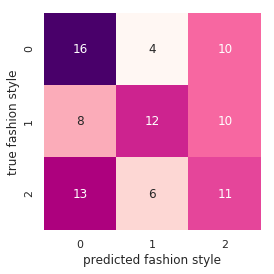

In [ ]:
mat_test = confusion_matrix(y_true=y_real_test, y_pred=y_predict_test,labels=[0,1,2])
sns.heatmap(mat_test, square = True, annot = True, cbar = False, cmap = 'RdPu')
plt.xlabel ('predicted fashion style')
plt.ylabel ('true fashion style')

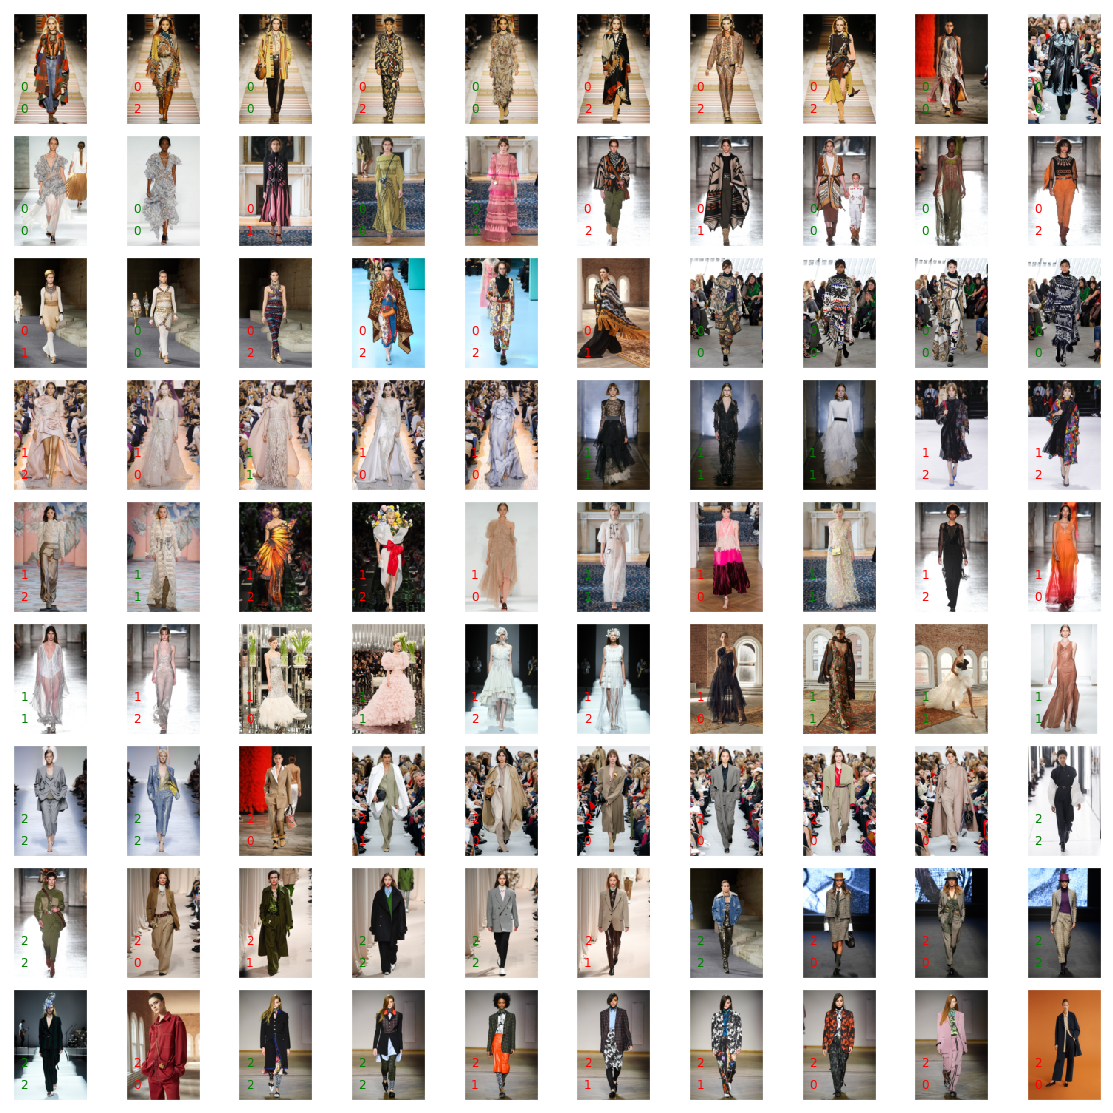

In [ ]:
fig,axes=plt.subplots(9,10,
                      figsize=(20,20),
                      subplot_kw ={'xticks':[],'yticks':[]}, 
                      gridspec_kw = dict(hspace =0.1, wspace = 0.1)
                     )
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i],cmap = 'binary', interpolation = 'nearest')
    ax.text(0.1, 0.3, str(y_real_test[i]),
        transform = ax.transAxes,
        color = 'green' if (y_predict_test[i] == y_real_test[i]) else 'red')
    
    ax.text(0.1, 0.1, str(y_predict_test[i]),
        transform = ax.transAxes,
        color = 'green' if (y_predict_test[i] == y_real_test[i]) else 'red')
plt.show()

In [ ]:
classification_report(y_true=y_real_test, y_pred=y_predict_test,labels=[0,1,2])

'             precision    recall  f1-score   support\n\n          0       0.43      0.53      0.48        30\n          1       0.55      0.40      0.46        30\n          2       0.35      0.37      0.36        30\n\navg / total       0.44      0.43      0.43        90\n'

In [ ]:
y_predict_train_prob=model.predict(x_train)
y_predict_train=np.argmax(y_predict_train_prob,axis=1)
y_real_train=np.argmax(y_train,axis=1)


Text(89.18,0.5,'true fashion style')

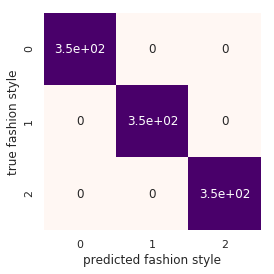

In [ ]:
mat_train = confusion_matrix(y_true=y_real_train, y_pred=y_predict_train,labels=[0,1,2])
sns.heatmap(mat_train, square = True, annot = True, cbar = False, cmap = 'RdPu')
plt.xlabel ('predicted fashion style')
plt.ylabel ('true fashion style')

In [ ]:
classification_report(y_true=y_real_train, y_pred=y_predict_train,labels=[0,1,2])

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       350\n          1       1.00      1.00      1.00       350\n          2       1.00      1.00      1.00       350\n\navg / total       1.00      1.00      1.00      1050\n'

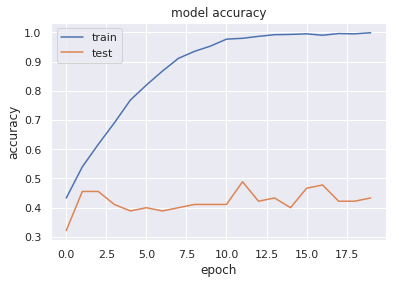

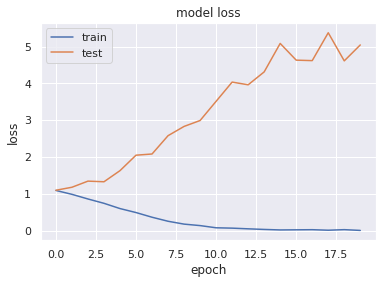

In [ ]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()